In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

OperationalError: (sqlite3.OperationalError) unable to open database file
(Background on this error at: http://sqlalche.me/e/e3q8)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

[]

In [8]:
# Save references to each table
Measurement= Base.classes.measurement
Station= Base.classes.station

AttributeError: measurement

In [52]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Climate Analysis

In [53]:
# Calculate the date 1 year ago from the last data point in the database
last=session.query(Measurement).order_by(Measurement.date.desc()).limit(1).all()
last_date= " " 

for info in last:
    last_date=info

print(last_date.date)

2017-08-23


In [54]:
first_day=dt.date(2017,8,23)-dt.timedelta(days=365)
first_day

datetime.date(2016, 8, 23)

In [55]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
results=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>= first_day).all()
#results 


In [56]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
percip_df=pd.DataFrame(results, columns=['date', 'precipitation'])
percip_df.set_index(['date'])
final_df= percip_df.sort_values('date')
final_df.tail()

,date,precipitation
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08
2229,2017-08-23,0.45


In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
stations=session.query(Measurement.tobs).filter(Measurement.station==most_active)\.filter(Measurement.date>= first_day)
results=[int(info[0]) for info in stations]
plt.hist(results, bins=12)
plt.xlabel('Temperature °F')
plt.ylabel('Frequency Count')
plt.title(f'Temperature Count for Station: {most_active}')
plt.legend('Temperature')
plt.show()

SyntaxError: unexpected character after line continuation character (<ipython-input-11-8bd0ddfd66a2>, line 2)

In [58]:
# Use Pandas to calcualte the summary statistics for the precipitation data
final_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [59]:
# Design a query to show how many stations are available in this dataset?
station_count=session.query(func.count(Station.id)).all()

print(f'There is a total of {station_count[0][0]} stations')

There is a total of 9 stations


In [60]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations=session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [61]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active=stations[0][0]
station_data=session.query(Measurement.tobs).filter(Measurement.station==most_active).all()

#Lowest, Highest and Average Temp
min_temp=session.query(func.min(Measurement.tobs)).filter(Measurement.station==most_active).all()
max_temp=session.query(func.max(Measurement.tobs)).filter(Measurement.station==most_active).all()
avg_temp=session.query(func.avg(Measurement.tobs)).filter(Measurement.station==most_active).all()

print(f'The lowest temp recorded is: {min_temp[0][0]}°F')
print(f'The highest temp recorded is: {max_temp[0][0]}°F')
print(f'The average temp is: {round(avg_temp[0][0],2)}°F')

The lowest temp recorded is: 54.0°F
The highest temp recorded is: 85.0°F
The average temp is: 71.66°F


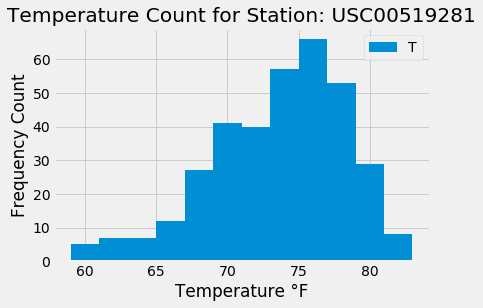

In [62]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stations=session.query(Measurement.tobs).filter(Measurement.station==most_active)\
.filter(Measurement.date>= first_day).all()

#Collect numbers into a list
results=[int(info[0]) for info in stations]

#Plot Graph
plt.hist(results, bins=12)
plt.xlabel('Temperature °F')
plt.ylabel('Frequency Count')
plt.title(f'Temperature Count for Station: {most_active}')
plt.legend('Temperature')
plt.show()

## Bonus Challenge Assignment

In [63]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [64]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
